In [1]:
from one.api import ONE
import numpy as np

one = ONE(base_url='https://openalyx.internationalbrainlab.org', password='international')
# specify experiment ID
eid = '19e66dc9-bf9f-430b-9d6a-acfa85de6fb7'

# load cluster IDs and corresponding channels
clusters = one.load_object(eid, 'clusters')
waveform_channels = clusters['waveformsChannels']

# load waveforms for each cluster
waveforms = one.load_dataset(eid, 'clusters.waveforms')

In [2]:
#!pip install umap-learn==0.5.3
from umap import umap_ as umap

#!pip install networkx==2.4
import networkx as nx

#!pip install python-igraph
import igraph as ig

/home/maria/anaconda3/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/maria/anaconda3/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/maria/anaconda3/lib/python3.9/site-packages/umap/distances.py:1086: NumbaDeprecationWarning:

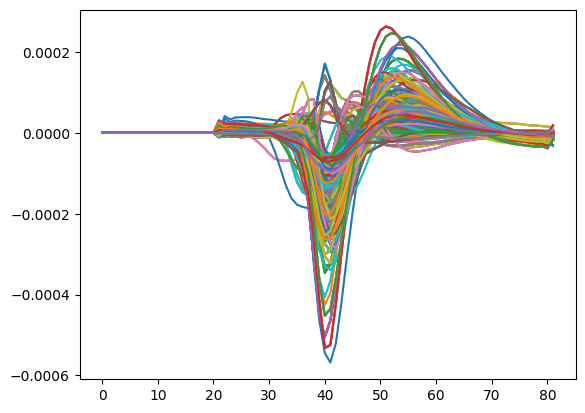

In [3]:
# plot EAP waveform for each cluster
import matplotlib.pyplot as plt
unnormWFs=[]
print()
for i, waveform_channel in enumerate(waveform_channels):
    channel_indices = np.squeeze(waveform_channel)
    cluster_waveform = waveforms[channel_indices, :,0][0]
    #print(cluster_waveform.shape)
    unnormWFs.append(cluster_waveform)
    plt.plot(cluster_waveform)
    

In [4]:
import sklearn.preprocessing
normWFs = sklearn.preprocessing.normalize(unnormWFs,norm = 'max')

In [5]:
from umap import umap_ as umap
reducer = umap.UMAP(random_state=78)
mapper = reducer.fit(normWFs)

In [6]:
from networkx import convert_matrix 
G = convert_matrix.from_scipy_sparse_array(mapper.graph_)

In [43]:
clustering = nx.community.louvain_partitions(G, seed=123,resolution=2)
#clustering_solution = list(clustering.values())

In [30]:
len(unnormWFs)

795

In [44]:
a=next(clustering)

In [45]:
clustering_solution=[]

for i in range(0,795):
    ind=0
    for j in a:
        if i in j:
            clustering_solution.append(ind)
        ind+=1

In [58]:
set(clustering_solution)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90}

In [46]:
len(clustering_solution)

795

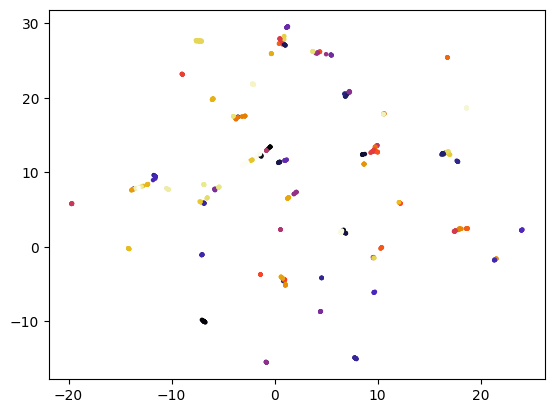

In [55]:
import pandas as pd
from matplotlib import cm
from matplotlib import pyplot as plt

embedding = reducer.fit_transform(normWFs)
umap_df = pd.DataFrame(embedding, columns=('x', 'y'))
umap_df['waveform'] = list(normWFs)
umap_df['cluster_id'] = clustering_solution
cmap = plt.get_cmap("CMRmap")
colors = cmap(np.linspace(0, 1, len(set(clustering_solution))))
umap_df['cluster_color'] = [colors[i] for i in clustering_solution]
plt.scatter(umap_df['x'].tolist(), umap_df['y'].tolist(), marker='o', s=5,c=umap_df['cluster_color'].tolist())

In [52]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=30).fit_transform(normWFs)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f75cf9d3d30>
Traceback (most recent call last):
  File "/home/maria/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/maria/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/maria/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/maria/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


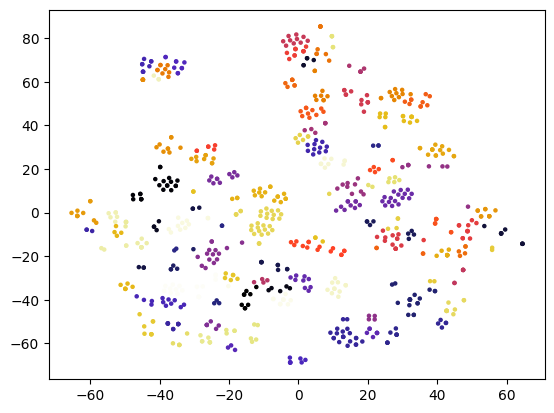

In [56]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], marker='o', s=5,c=umap_df['cluster_color'].tolist())

In [40]:
umap_df.isnull().any()

x                False
y                False
waveform         False
cluster_id       False
cluster_color    False
dtype: bool

In [33]:
umap_df

,x,y,waveform,cluster_id,cluster_color
0,0.188852,9.804426,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[0.21291, 0.12947, 0.37314, 1.0]"
1,0.186721,9.801473,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[0.21291, 0.12947, 0.37314, 1.0]"
2,0.139337,9.858739,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[0.21291, 0.12947, 0.37314, 1.0]"
3,-18.856768,5.060472,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0.18995, 0.07176, 0.23217, 1.0]"
4,0.181907,9.813853,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[0.21291, 0.12947, 0.37314, 1.0]"
...,...,...,...,...,...
790,17.976267,1.841007,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",8,"[0.27381, 0.52069, 0.97899, 1.0]"
791,-21.146965,9.091846,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",40,"[0.89298, 0.26981, 0.03993, 1.0]"
792,-8.691888,8.364291,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,"[0.23288, 0.62923, 0.99202, 1.0]"
793,27.878962,1.524328,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",41,"[0.86079, 0.22945, 0.02875, 1.0]"
